In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from colorspacious import cspace_converter

In [39]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
aleph = np.vstack((gradient, np.flip(gradient)))
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

def plot_color_gradients_alpha(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh), facecolor=(0.1,0.1,0.1))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name], alpha=aleph)
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

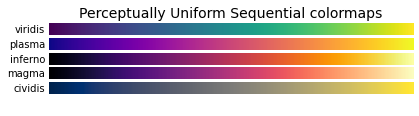

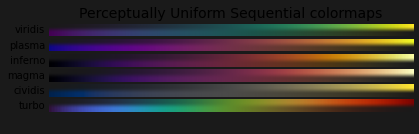

In [42]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plot_color_gradients_alpha('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis','turbo'])
# turbo map - seems good for visualisation of spectral colours
# still - look up a possible better colormap
# can feed custom colours if we want to be more fancy if the input file  has rgba in 
# all image cells - see documentation of the fucntion

Steps to do:

 - `imshow` displays image from 2d array, can get more custom with it
 - `cmap` maps the image cells to the corresponding colour based on the cell value
 - `alpha` is an additional array the same size as the data, gives opacity values. We want to use this as the normalised value of our spectra (the y-values) since we want to visualise the intensity as the colour intensity - from black to fully saturated
 - `facecolor` is the background colour of the figure. Since the opacity gives the intensity, if opacity is = 0, then the pixel values appear as the background colour. Thus, we set the background to ~ black, so when we have relatively zero intensity, it appears as black.

The above example is taken from the references of matplotlib references.

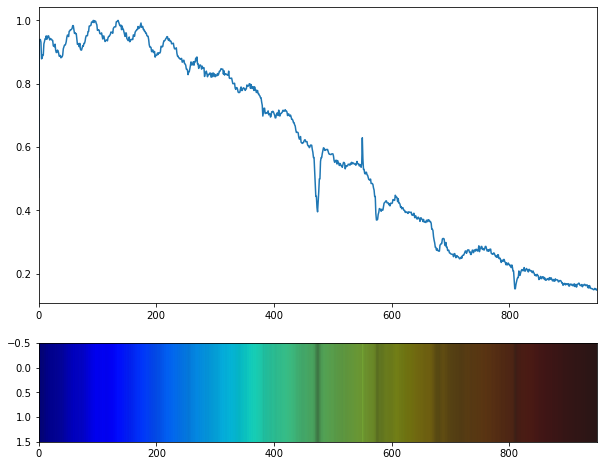

In [32]:
# import csv file with spectrum
import pandas as pd

# name of csv spectral data to visualise
path_spec_raw = './hr718-extr-1d-spec.csv'

spec_raw = pd.read_csv(path_spec_raw)

def plot_spec_barcode(raw):
    intensity = raw['Signal'] / max(raw['Signal'])
    coords = raw['Lambda']
    image = np.vstack((coords,coords))
    aleph = np.vstack((intensity,intensity))
    spec = range(len(intensity))

    fig, axs = plt.subplots(2,1, figsize=(10, 8), gridspec_kw={'height_ratios':[3,1]})

    axs[0].plot(spec,intensity)
    axs[0].set_xlim(spec[0],spec[-1])
    
    axs[1].set_facecolor((0.1,0.1,0.1))
    axs[1].imshow(image, aspect='auto', cmap='jet', alpha=aleph)

plot_spec_barcode(spec_raw)